In [9]:
# imports
import pandas as pd
import numpy as np
from dateutil import parser

In [10]:
# configs
import warnings
warnings.filterwarnings("ignore")

In [11]:
# read csvs & build dataframe
df = pd.DataFrame()
df_temp = pd.read_csv('./datasets/temperatura_featured.csv')
df_vendas = pd.read_csv('./datasets/vendas.csv', ';')
df_conc = pd.read_csv('./datasets/concorrentes.csv', ';')

In [12]:
# pre-processing
def get_dias_fechados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-11-02', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-04-19', '2019-11-02', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_fds():
    return ['Sunday', 'Saturday']

def get_dias_feriados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-04-21', '2018-04-30', '2018-05-01', '2018-05-31', '2018-06-01', '2018-09-07', '2018-10-12', '2018-11-02', '2018-11-15', '2018-11-16', '2018-12-24', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', 
'2019-01-01', '2019-03-04', '2019-03-05', '2019-04-19', '2019-04-21', '2019-05-01', '2019-06-20', '2019-06-21', '2019-09-07', '2019-10-12', '2019-11-02', '2019-11-15', '2019-12-25', '2019-12-25', '2019-12-25', '2019-12-30', '2019-12-31', 
'2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_festivos():
    return ['2018-02-12', '2018-02-13', '2018-05-13', '2018-08-12', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-05-12', '2019-08-11', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_vesperas_dias_festivos():
    vesperas = []
    for i in range(len(get_dias_festivos())):
        vesperas_dia_festivo_current = pd.Series(pd.date_range(end=get_dias_festivos()[i], periods=5, closed='left'))
        for j in range(len(vesperas_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (vesperas_dia_festivo_current[j] != get_dias_festivos()[o]):
                    vesperas.append(vesperas_dia_festivo_current[j])
    return vesperas

def get_pos_dias_festivos():
    pos = []
    for i in range(len(get_dias_festivos())):
        pos_dia_festivo_current = pd.Series(pd.date_range(get_dias_festivos()[i], periods=3, closed='right'))
        for j in range(len(pos_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (pos_dia_festivo_current[j] != get_dias_festivos()[o]):
                    pos.append(pos_dia_festivo_current[j])
    return pos

def get_dias_acerca_pagamento():
    return [5,6,7,8,9,10,28,29,30,31]

def get_meses_baixas_temporadas():
    return [1, 2]

# preprocessing
df.insert(loc=0, column='DATA', value=(pd.to_datetime(df_vendas['DATA'], dayfirst=True)))
df.insert(loc=1, column='VENDAS', value=(df_vendas['VENDAS'].fillna(0)))
df.insert(loc=2, column='IS_FECHADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados())))
df.insert(loc=3, column='IS_FDS', value=(pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())))
df.insert(loc=4, column='IS_FERIADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())))
df.insert(loc=5, column='IS_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())))
df.insert(loc=6, column='IS_VESPERA_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())))
df.insert(loc=7, column='IS_POS_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos())))
df.insert(loc=8, column='IS_SEMANA_PAGAMENTO', value=(pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento())))
df.insert(loc=9, column='IS_BAIXA_TEMPORADA', value=(pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas())))
df.insert(loc=10, column='QTD_CONCORRENTES', value=(df_conc['CONCORRENTES'].fillna(0)))
df.insert(loc=11, column='PRECIPITACAO', value=(df_temp['PRECIPITACAO']))
df.insert(loc=12, column='TEMPERATURA', value=(df_temp['TEMPERATURA']))
df.insert(loc=13, column='UMIDADE', value=(df_temp['UMIDADE']))

# removing outliers
df = df.query('IS_FECHADO == 0')
df = df.drop(columns=['IS_FECHADO'])

In [13]:
df

,DATA,VENDAS,IS_FDS,IS_FERIADO,IS_DATA_FESTIVA,IS_VESPERA_DATA_FESTIVA,IS_POS_DATA_FESTIVA,IS_SEMANA_PAGAMENTO,IS_BAIXA_TEMPORADA,QTD_CONCORRENTES,PRECIPITACAO,TEMPERATURA,UMIDADE
0,2018-02-14,132,False,False,False,False,True,False,True,7,0.0,28.0,66.75
1,2018-02-15,149,False,False,False,False,True,False,True,7,0.0,28.6,61.50
2,2018-02-16,130,False,False,False,False,False,False,True,7,0.0,30.6,65.25
3,2018-02-17,174,True,False,False,False,False,False,True,7,0.0,31.5,65.75
4,2018-02-18,185,True,False,False,False,False,False,True,7,0.0,33.4,58.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2020-03-02,99,False,False,False,False,False,False,False,13,0.0,29.2,66.00
748,2020-03-03,70,False,False,False,False,False,False,False,13,0.0,30.0,70.00
749,2020-03-04,98,False,False,False,False,False,False,False,13,0.0,29.7,67.00
750,2020-03-05,121,False,False,False,False,False,True,False,13,0.0,28.8,67.00


In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# featured engineering
X = df.drop(columns=['DATA', 'VENDAS'])
y = df.drop(columns=['DATA', 'IS_FDS', 'IS_FERIADO', 'IS_DATA_FESTIVA', 'IS_VESPERA_DATA_FESTIVA', 'IS_POS_DATA_FESTIVA', 'IS_SEMANA_PAGAMENTO', 'IS_BAIXA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])

# standardization & normalization
X = preprocessing.scale(X)

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 751
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATA                     733 non-null    datetime64[ns]
 1   VENDAS                   733 non-null    int64         
 2   IS_FDS                   733 non-null    bool          
 3   IS_FERIADO               733 non-null    bool          
 4   IS_DATA_FESTIVA          733 non-null    bool          
 5   IS_VESPERA_DATA_FESTIVA  733 non-null    bool          
 6   IS_POS_DATA_FESTIVA      733 non-null    bool          
 7   IS_SEMANA_PAGAMENTO      733 non-null    bool          
 8   IS_BAIXA_TEMPORADA       733 non-null    bool          
 9   QTD_CONCORRENTES         733 non-null    int64         
 10  PRECIPITACAO             733 non-null    float64       
 11  TEMPERATURA              733 non-null    float64       
 12  UMIDADE                  733 non-nul

In [16]:
df.min()

DATA                       2018-02-14 00:00:00
VENDAS                                      59
IS_FDS                                   False
IS_FERIADO                               False
IS_DATA_FESTIVA                          False
IS_VESPERA_DATA_FESTIVA                  False
IS_POS_DATA_FESTIVA                      False
IS_SEMANA_PAGAMENTO                      False
IS_BAIXA_TEMPORADA                       False
QTD_CONCORRENTES                             7
PRECIPITACAO                                 0
TEMPERATURA                               10.9
UMIDADE                                  48.75
dtype: object

In [17]:
df.max()

DATA                       2020-03-06 00:00:00
VENDAS                                     261
IS_FDS                                    True
IS_FERIADO                                True
IS_DATA_FESTIVA                           True
IS_VESPERA_DATA_FESTIVA                   True
IS_POS_DATA_FESTIVA                       True
IS_SEMANA_PAGAMENTO                       True
IS_BAIXA_TEMPORADA                        True
QTD_CONCORRENTES                            13
PRECIPITACAO                              79.4
TEMPERATURA                                 39
UMIDADE                                     97
dtype: object

In [18]:
df.mean()

VENDAS                     127.575716
IS_FDS                       0.285130
IS_FERIADO                   0.023192
IS_DATA_FESTIVA              0.005457
IS_VESPERA_DATA_FESTIVA      0.051842
IS_POS_DATA_FESTIVA          0.030014
IS_SEMANA_PAGAMENTO          0.302865
IS_BAIXA_TEMPORADA           0.177353
QTD_CONCORRENTES            10.032742
PRECIPITACAO                 4.036426
TEMPERATURA                 26.138745
UMIDADE                     75.890518
dtype: float64

In [19]:
df.median()

VENDAS                     128.00
IS_FDS                       0.00
IS_FERIADO                   0.00
IS_DATA_FESTIVA              0.00
IS_VESPERA_DATA_FESTIVA      0.00
IS_POS_DATA_FESTIVA          0.00
IS_SEMANA_PAGAMENTO          0.00
IS_BAIXA_TEMPORADA           0.00
QTD_CONCORRENTES            10.00
PRECIPITACAO                 0.00
TEMPERATURA                 26.60
UMIDADE                     75.75
dtype: float64

In [20]:
df.std()

VENDAS                     26.420803
IS_FDS                      0.451784
IS_FERIADO                  0.150617
IS_DATA_FESTIVA             0.073720
IS_VESPERA_DATA_FESTIVA     0.221859
IS_POS_DATA_FESTIVA         0.170741
IS_SEMANA_PAGAMENTO         0.459811
IS_BAIXA_TEMPORADA          0.382228
QTD_CONCORRENTES            1.189213
PRECIPITACAO                9.874036
TEMPERATURA                 5.737748
UMIDADE                    10.488693
dtype: float64

In [21]:
print(df.isnull().values.any())
print(df.isna().values.any())

False
False


In [22]:
df

,DATA,VENDAS,IS_FDS,IS_FERIADO,IS_DATA_FESTIVA,IS_VESPERA_DATA_FESTIVA,IS_POS_DATA_FESTIVA,IS_SEMANA_PAGAMENTO,IS_BAIXA_TEMPORADA,QTD_CONCORRENTES,PRECIPITACAO,TEMPERATURA,UMIDADE
0,2018-02-14,132,False,False,False,False,True,False,True,7,0.0,28.0,66.75
1,2018-02-15,149,False,False,False,False,True,False,True,7,0.0,28.6,61.50
2,2018-02-16,130,False,False,False,False,False,False,True,7,0.0,30.6,65.25
3,2018-02-17,174,True,False,False,False,False,False,True,7,0.0,31.5,65.75
4,2018-02-18,185,True,False,False,False,False,False,True,7,0.0,33.4,58.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2020-03-02,99,False,False,False,False,False,False,False,13,0.0,29.2,66.00
748,2020-03-03,70,False,False,False,False,False,False,False,13,0.0,30.0,70.00
749,2020-03-04,98,False,False,False,False,False,False,False,13,0.0,29.7,67.00
750,2020-03-05,121,False,False,False,False,False,True,False,13,0.0,28.8,67.00


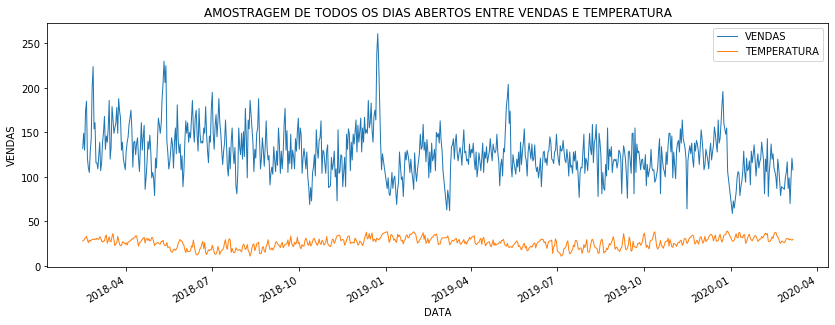

In [23]:
import mpld3
import matplotlib.style as style
import matplotlib.pyplot as plt
mpld3.enable_notebook()

df.plot(y=['VENDAS', 'TEMPERATURA'], x='DATA', figsize=(14, 5), linestyle='solid', linewidth=1, markersize=1)
plt.legend(loc=1)
plt.title('AMOSTRAGEM DE TODOS OS DIAS ABERTOS ENTRE VENDAS E TEMPERATURA')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()

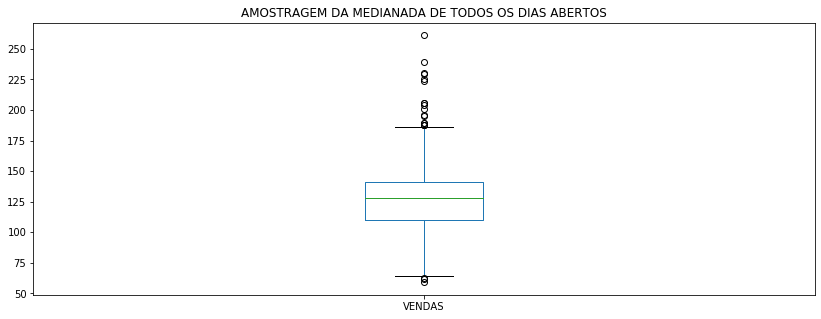

In [24]:
df.plot(y='VENDAS', x='DATA', figsize=(14, 5), kind='box')
plt.title('AMOSTRAGEM DA MEDIANADA DE TODOS OS DIAS ABERTOS')
plt.show()

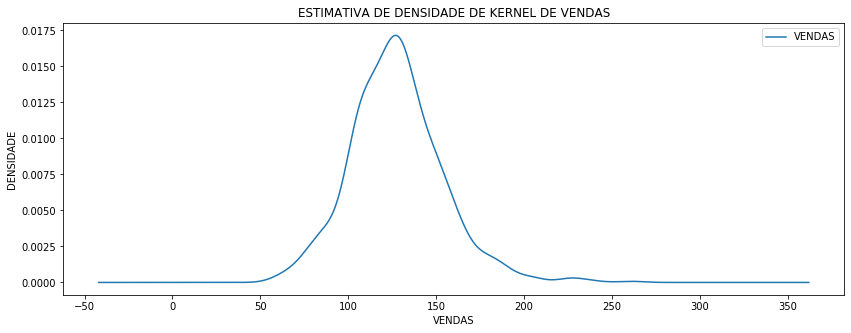

In [25]:
df.plot(y='VENDAS', x='DATA', figsize=(14, 5), kind='kde')
plt.legend(loc=1)
plt.title('ESTIMATIVA DE DENSIDADE DE KERNEL DE VENDAS')
plt.xlabel('VENDAS')
plt.ylabel('DENSIDADE')
plt.show()

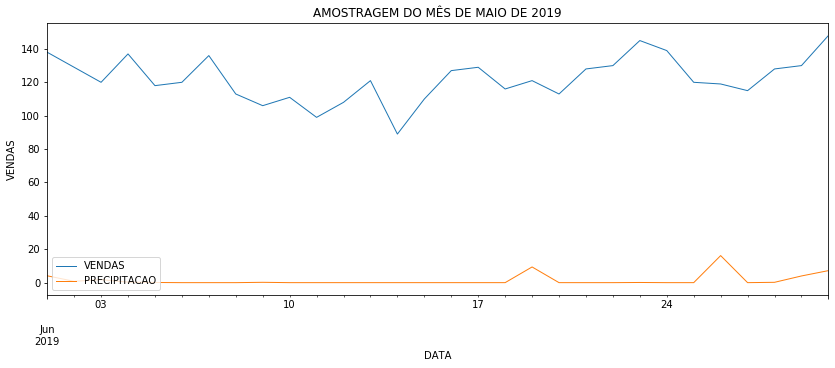

In [26]:
query = (df['DATA'] >= "2019-06-01") & (df['DATA'] <= "2019-06-30")
df2 = df.loc[query]
df2.sort_values(by=['DATA'], inplace=True, ascending=True)
df2.plot(y=['VENDAS', 'IS_FDS', 'PRECIPITACAO'], x='DATA', figsize=(14, 5), linestyle='solid', linewidth=1, markersize=1)
plt.legend(loc=3)
plt.title('AMOSTRAGEM DO MÊS DE MAIO DE 2019')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()

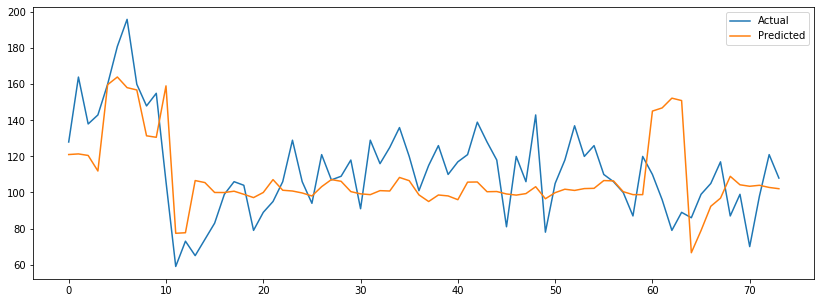

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
df1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='line', figsize=(14, 5))
plt.show()

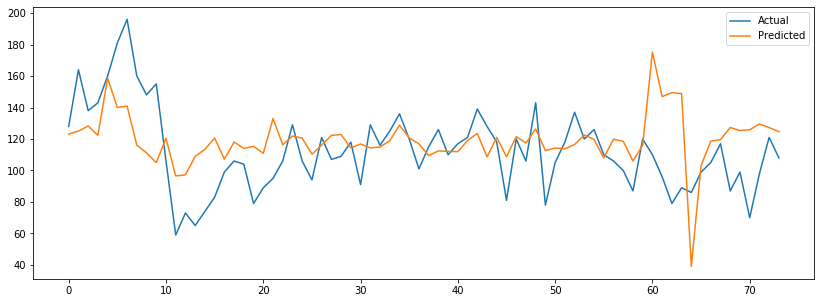

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy = gb.score(X_test, y_test)
df1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='line', figsize=(14, 5))
plt.show()

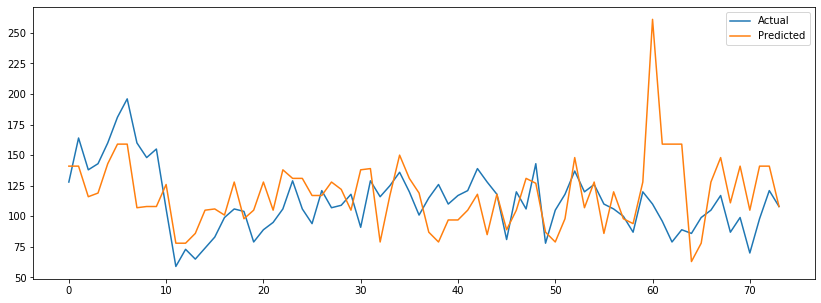

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = tree.score(X_test, y_test)
df1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='line', figsize=(14, 5))
plt.show()